In [18]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"] # add there all your images file extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
image_size = (64, 64)
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 "hair_types",
 validation_split=0.2,
 subset="training",
 seed=1337,
 image_size=image_size,
 batch_size=batch_size,
 labels='inferred',
 label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 "hair_types",
 validation_split=0.2,
 subset="validation",
 seed=1337,
 image_size=image_size,
 batch_size=batch_size,
 labels='inferred',
 label_mode='categorical'
)


Found 984 files belonging to 3 classes.
Using 788 files for training.
Using 788 files for training.
Found 984 files belonging to 3 classes.
Using 196 files for validation.


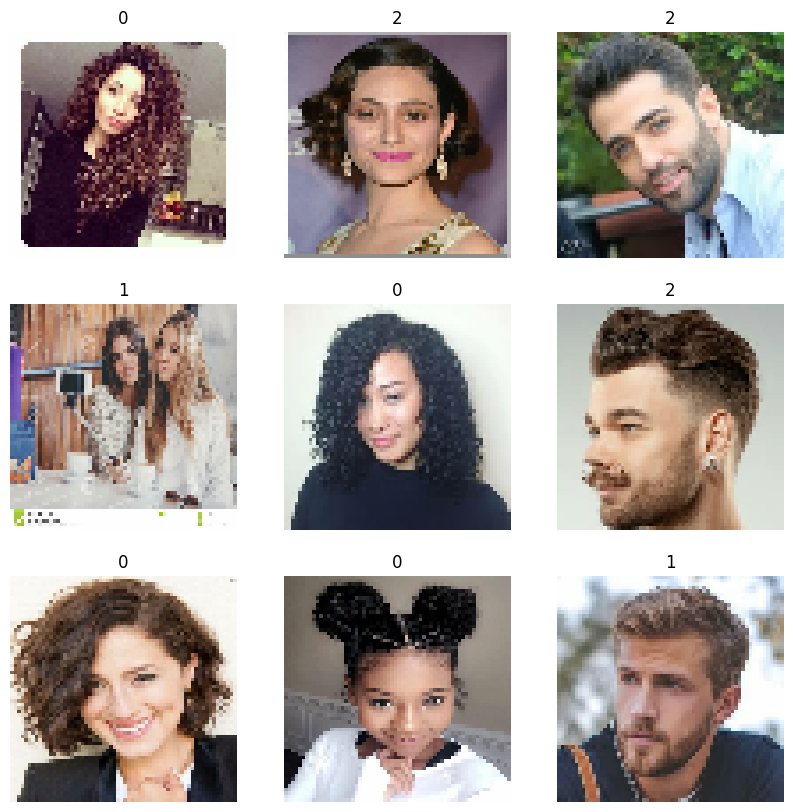

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(np.argmax(labels[i])))
    plt.axis("off")
plt.show()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.3129 - loss: 1.1011 - val_accuracy: 0.2857 - val_loss: 1.0978
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3795 - loss: 1.0871 - val_accuracy: 0.3622 - val_loss: 1.0922
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.3467 - loss: 1.1029 - val_accuracy: 0.2857 - val_loss: 1.1150
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3656 - loss: 1.0493 - val_accuracy: 0.3929 - val_loss: 1.0799
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4719 - loss: 1.0363 - val_accuracy: 0.4235 - val_loss: 1.0972
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4926 - loss: 1.0101 - val_accuracy: 0.4439 - val_loss: 1.0548
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5003 - loss: 1.0201 - val_accuracy: 0.4796 - val_loss: 1.0391
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4977 - loss: 0.9900 - val_accuracy: 0.4745 - v

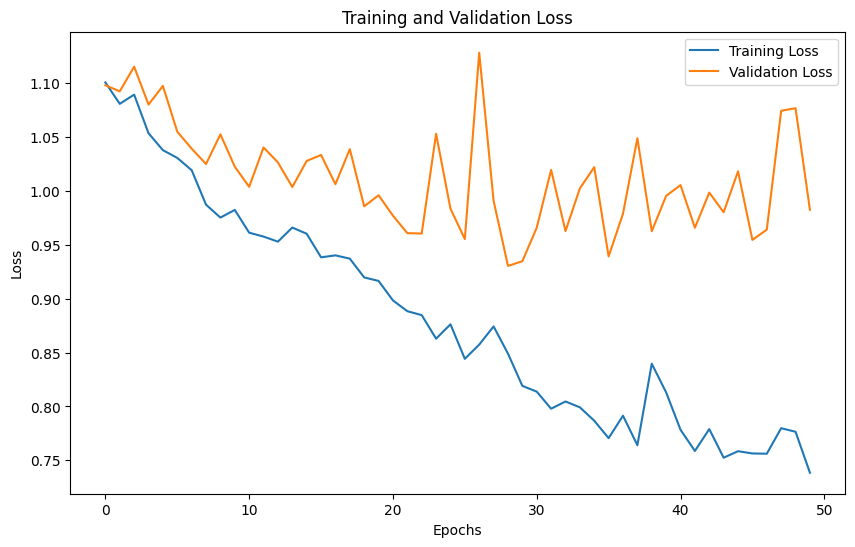

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))
model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

#tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 50

model.compile(
 optimizer=keras.optimizers.Adam(1e-3),
 loss="categorical_crossentropy",
 metrics=["accuracy"],
)

import matplotlib.pyplot as plt

# Assuming train_ds and val_ds are defined and the model is compiled
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [22]:
img = keras.preprocessing.image.load_img(
"hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create batch axis
predictions = model.predict(img_array)
print(
 "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
 % tuple(predictions[0])
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This image is 0.93 percent curly hair, 0.06 percent straight hair, and 0.01 percent wavy hair.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This image is 0.93 percent curly hair, 0.06 percent straight hair, and 0.01 percent wavy hair.
